In [2]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cv2
import io

In [3]:
PATH = "1-137-A-32.wav"
y, sr = librosa.load(PATH, duration=8, mono=True)



In [4]:
mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, hop_length=32)
mel_spect_dB = librosa.power_to_db(mel_spect, ref=np.max)

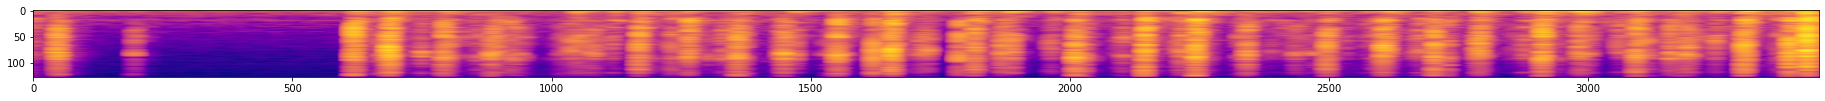

In [7]:
fig, ax = plt.subplots(figsize=(32, 24))
im = ax.imshow(mel_spect_dB, cmap=cm.plasma)
plt.show()
fig.savefig("./ThisImage.png", dpi=10)

In [10]:
# define a function which returns an image as numpy array from figure
def get_img_from_fig(fig, dpi=10):
    buf = io.BytesIO()
    fig.savefig(buf, format="png", dpi=dpi)
    buf.seek(0)
    img_arr = np.frombuffer(buf.getvalue(), dtype=np.uint8)
    buf.close()
    img = cv2.imdecode(img_arr, cv2.IMREAD_GRAYSCALE)
    img = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)

    return img

In [11]:
img = get_img_from_fig(fig)
showImage = cv2.imshow("grayscale_spec", img)
cv2.waitKey(0)

-1

In [ ]:
def plot_mel_spect(mfcc, cmap=None):
    """
    this function will take the mfcc/mel_spectrogram dictionary and plot the signals
    """
    
    fig.suptitle('mel')
    i=0
    for x in range(5):
        for y in range(2):
            axes[x,y].set_title(list(mfccs.keys())[i])
            axes[x,y].imshow(list(mfccs.values())[i], cmap=cmap,interpolation='nearest')
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i+=1